In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'	      testData.csv     trainLabels.csv
'emotion detection dateset'   testLabels.csv
'Getting started.pdf'	      trainData.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
X_train = pd.read_csv('/content/drive/MyDrive/trainData.csv')
Y_train = pd.read_csv('/content/drive/MyDrive/trainLabels.csv')

X_test = pd.read_csv('/content/drive/MyDrive/testData.csv')
Y_test = pd.read_csv('/content/drive/MyDrive/testLabels.csv')

In [4]:
columns = []
for col in range(784):
    columns.append(str(col))

X_train.columns = columns
Y_train.columns = ['label']
X_test.columns = columns
Y_test.columns = ['label']

In [5]:
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)

In [6]:
X_test = stand_scal.transform (X_test)

In [7]:
mu = []
for i in range(10):
    for j in range(784):
        Xj = X_train[:, j]
        mu_ = np.mean(Xj[np.where(Y_train==i)[0]])
        mu.append(mu_)

In [8]:
mu = np.array(mu).reshape(10, 784)

In [9]:
ex_mu = []
for i in range(1, 59999):
    ex_mu.append(mu[np.array(Y_train)[i]])

In [38]:
S_w = np.zeros((784, 784))
for i in range(59999):
    try:
        s = np.subtract(X_train[i], ex_mu[i])
        s_prime = np.dot(s.T, s)
        S_w = S_w + s_prime

    except Exception as e:
        print(i)

59998


In [11]:
np.savetxt('Sw.txt', S_w)

In [12]:
ov_mu = np.mean(mu, axis=0)

In [13]:
n_k = np.zeros((1, 10))
for i in range(1, 59999):
    for j in range(10):
        if np.array(Y_train)[i] == j:
            n_k[0, j] += 1

print(n_k)

[[5999. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 5999.]]


In [39]:
S_b = np.zeros((784, 784))
for i in range(10):
    s = np.subtract(mu[i], ov_mu)
    s_prime = n_k[0, i] * np.dot(s, s.T)
    S_b = S_b + s_prime

print(S_b)

[[15204959.36754926 15204959.36754926 15204959.36754926 ...
  15204959.36754926 15204959.36754926 15204959.36754926]
 [15204959.36754926 15204959.36754926 15204959.36754926 ...
  15204959.36754926 15204959.36754926 15204959.36754926]
 [15204959.36754926 15204959.36754926 15204959.36754926 ...
  15204959.36754926 15204959.36754926 15204959.36754926]
 ...
 [15204959.36754926 15204959.36754926 15204959.36754926 ...
  15204959.36754926 15204959.36754926 15204959.36754926]
 [15204959.36754926 15204959.36754926 15204959.36754926 ...
  15204959.36754926 15204959.36754926 15204959.36754926]
 [15204959.36754926 15204959.36754926 15204959.36754926 ...
  15204959.36754926 15204959.36754926 15204959.36754926]]


In [15]:
np.savetxt('Sb.txt', S_b)

In [27]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
eigen_vals.shape, eigen_vecs.shape

((784,), (784, 784))

In [29]:
eigen_values = []
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0],reverse = True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs :
    print(eigen_val[0])
    eigen_values.append(eigen_val[0])

Eigenvalues in decreasing order:

8070.699620159847
2.0583341641628214e-12
2.0583341641628214e-12
1.6960511983798506e-12
1.6960511983798506e-12
1.6450180428910425e-12
1.6450180428910425e-12
1.5089317366751146e-12
1.5089317366751146e-12
1.462501131223967e-12
1.462501131223967e-12
1.3835993479062638e-12
1.3835993479062638e-12
1.3492484280052587e-12
1.3492484280052587e-12
1.2662342323132504e-12
1.2662342323132504e-12
1.187501641214482e-12
1.187501641214482e-12
1.1530463402947472e-12
1.1530463402947472e-12
1.0984476892988954e-12
1.0984476892988954e-12
1.065089513414223e-12
1.065089513414223e-12
1.0562878560223667e-12
1.0562878560223667e-12
1.017685053813668e-12
1.0079230420071054e-12
1.0079230420071054e-12
9.417853929150994e-13
9.417853929150994e-13
8.414134753101219e-13
8.414134753101219e-13
8.400676895681746e-13
8.400676895681746e-13
6.88922877973353e-13
6.88922877973353e-13
6.14333744382738e-13
5.834006155707319e-13
5.834006155707319e-13
5.736592637297614e-13
5.736592637297614e-13
5.528

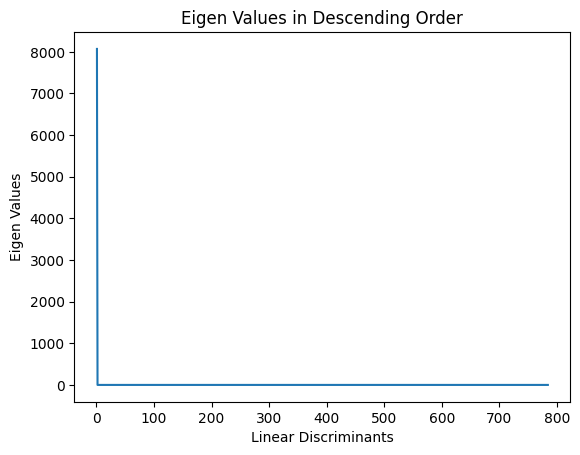

In [32]:
plt.plot(range(1, 785), eigen_values)
plt.ylabel('Eigen Values')
plt.xlabel('Linear Discriminants')
plt.title('Eigen Values in Descending Order')
plt.show()

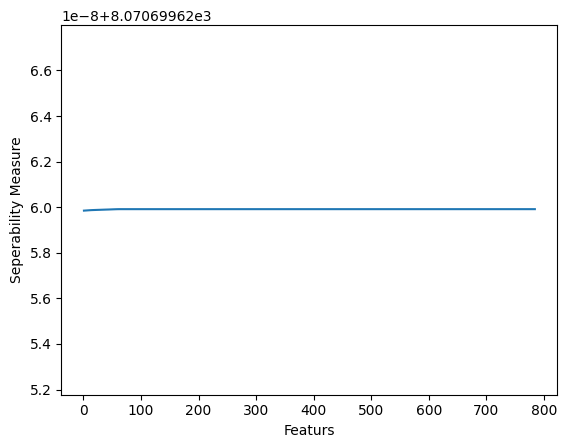

In [45]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
eigen_values = []
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
for eigen_val in eigen_pairs :
    eigen_values.append(eigen_val[0])
plt.plot(range(1, 785), np.cumsum(eigen_values))
plt.ylabel('Seperability Measure')
plt.xlabel('Featurs')
plt.show()